In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [40]:
ds = load_dataset("beanham/spatial_join_dataset")

In [70]:
degrees=[1,2,5,10,15,20]
test=ds['test']
test_gt=np.array(ds['test']['label'])
heuristic_accuracy=[]
llama_accuracy=[]
for d in degrees:
    heuristis_pred=np.array(test['min_angle'])<=d
    llama_pred=np.load(f'llama3_degree_{d}.npy')
    llama_pred=np.array([int(i.replace('<|eot_id|>', '').split('Label:')[1].strip()) for i in llama_pred])    
    heuristic_accuracy.append(accuracy_score(test_gt, heuristis_pred))
    llama_accuracy.append(accuracy_score(test_gt, llama_pred))

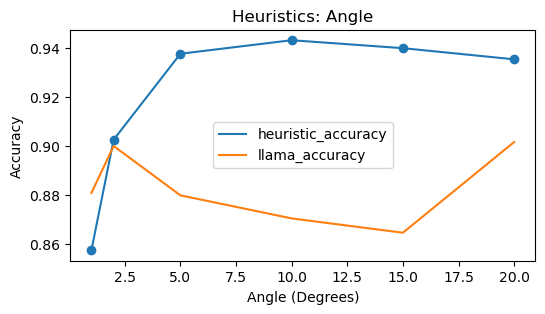

In [71]:
plt.figure(figsize=(6,3))
plt.plot(degrees,heuristic_accuracy,label='heuristic_accuracy')
plt.plot(degrees,llama_accuracy,label='llama_accuracy')
plt.scatter(degrees, accuracy)
plt.title('Heuristics: Angle')
plt.ylabel('Accuracy')
plt.xlabel('Angle (Degrees)')
plt.legend()
pass    